# Weight Predictor

In [1]:
#Importing useful libraries
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Weight.csv") #creating a dataframe
print(data.head(6)) #printing out top 6 rows of the dataset

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
5   Male  67.253016  152.212156


In [3]:
X = pd.get_dummies(data.iloc[:,0:2])
Y = data.iloc[:,2].values.reshape(10000,1)

In [4]:
X = X.values
print(X)

[[73.84701702  0.          1.        ]
 [68.78190405  0.          1.        ]
 [74.11010539  0.          1.        ]
 ...
 [63.86799221  1.          0.        ]
 [69.03424313  1.          0.        ]
 [61.94424588  1.          0.        ]]


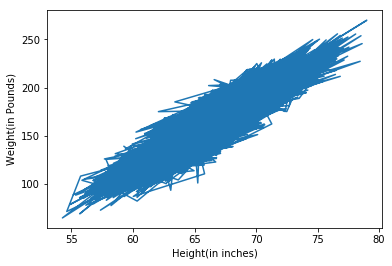

In [6]:
import matplotlib.pyplot as plt

plt.plot(X[:,0],Y)
plt.xlabel('Height(in inches)')
plt.ylabel ('Weight(in Pounds)')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize = True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state = 5)

In [9]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [10]:
A = reg.coef_
B = reg.intercept_

In [11]:
# Root mean square error of training set
J = np.dot(((np.dot(X_train,A.T) + B - Y_train).T),(np.dot(X_train,A.T) + B - Y_train))/8000
print(np.sqrt(J))

[[10.0414745]]


In [12]:
# Root mean square error of test set
J = np.dot(((np.dot(X_test,A.T) + B - Y_test).T),(np.dot(X_test,A.T) + B - Y_test))/2000
print(np.sqrt(J))

[[9.89971632]]


In [13]:
P = np.array([[69.5,1,0]]) #Testing on my data
reg.predict(P) #My actual weight is 185 pounds

array([[170.74264278]])

Given data is not enough to predict Weight accurately. We need more features like Age, Daily Active Time, etc. to make a better model. 